In [2]:
from mordecai import Geoparser
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
#import training data
train = pd.read_csv("data/train.csv")

In [13]:
#store string to test geoparser
test_string = train.at[1, 'text']
print(test_string)

Forest fire near La Ronge Sask. Canada


In [21]:
#instantiate geoparser and run on test string
geo = Geoparser()
test_result = geo.geoparse(test_string)
print(test_result)

Models path: /Users/emmastiefel/Documents/GitHub/disaster-tweets-classifier/sos-env/lib/python3.7/site-packages/mordecai/models/
[{'word': 'La Ronge Sask', 'spans': [{'start': 17, 'end': 30}], 'country_predicted': 'USA', 'country_conf': 0.2353872}, {'word': 'Canada', 'spans': [{'start': 32, 'end': 38}], 'country_predicted': 'CAN', 'country_conf': 0.9516948, 'geo': {'admin1': 'NA', 'lat': '60.10867', 'lon': '-113.64258', 'country_code3': 'CAN', 'geonameid': '6251999', 'place_name': 'Canada', 'feature_class': 'A', 'feature_code': 'PCLI'}}]


In [25]:
##iterate through every row and geoparse location data

#add column for geoparsed locations
train.insert(0, 'geoparsed_location', [[] for i in range(len(train))])

for i, row in train.iterrows():
    print(i, ': start')
    this_location = row['location']
    this_geoparsed_locations = []
    #skip locations that arent strings
    if type(this_location) == type('s'):
        this_result = geo.geoparse(this_location)
        #iterate through the results for each location entity identified
        for location in this_result:
            #append the geo dictionary if it exists/if a location was successfully identified
            try:
                this_geoparsed_locations.append(location['geo'])
            except: 
                pass
        #store in dataframe
        train.at[i, 'geoparsed_location'] = this_geoparsed_locations
    #print for checking accuracy
    print(this_location, this_geoparsed_locations)

8', 'country_code3': 'USA', 'geonameid': '4319780', 'place_name': 'Chevron USA Incorporated Seaplane Base', 'feature_class': 'S', 'feature_code': 'AIRP'}]
7414 : start
Suva, Fiji Islands. [{'admin1': 'Central', 'lat': '-18.14161', 'lon': '178.44149', 'country_code3': 'FJI', 'geonameid': '2198148', 'place_name': 'Suva', 'feature_class': 'P', 'feature_code': 'PPLC'}, {'admin1': 'NA', 'lat': '-18', 'lon': '178', 'country_code3': 'FJI', 'geonameid': '2205218', 'place_name': 'Republic of Fiji', 'feature_class': 'A', 'feature_code': 'PCLI'}]
7415 : start
nan []
7416 : start
nan []
7417 : start
nan []
7418 : start
Americas Newsroom []
7419 : start
nan []
7420 : start
USA [{'admin1': 'Louisiana', 'lat': '29.2605', 'lon': '-89.35478', 'country_code3': 'USA', 'geonameid': '4319780', 'place_name': 'Chevron USA Incorporated Seaplane Base', 'feature_class': 'S', 'feature_code': 'AIRP'}]
7421 : start
Yogya Berhati Nyaman []
7422 : start
Washington, D.C. [{'admin1': 'Washington', 'lat': '47.50012', '

In [26]:
##repeat, but for text data instead of location data
train.insert(0, 'geoparsed_text', [[] for i in range(len(train))])

for i, row in train.iterrows():
    print(i, ': start')
    this_location = row['text']
    this_geoparsed_locations = []
    #skip locations that arent strings
    if type(this_location) == type('s'):
        try: #handle errors by replacing with empty list
            this_result = geo.geoparse(this_location)
        except:
            this_result = []
        #iterate through the results for each location entity identified
        for location in this_result:
            #append the geo dictionary if it exists/if a location was successfully identified
            try:
                this_geoparsed_locations.append(location['geo'])
            except: 
                pass
            
        #store in dataframe
        train.at[i, 'geoparsed_text'] = this_geoparsed_locations
    #print for checking accuracy
    print(this_location, this_geoparsed_locations)

', 'feature_code': 'PCLI'}]
7525 : start
The first piece of wreckage from the first-ever lost Boeing 777 which vanished back in early March along with the 239 people on board has []
7526 : start
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/VAZpG0ftmU [{'admin1': 'NA', 'lat': '2.5', 'lon': '112.5', 'country_code3': 'MYS', 'geonameid': '1733045', 'place_name': 'Malaysia', 'feature_class': 'A', 'feature_code': 'PCLI'}]
7527 : start
#science Now that a piece of wreckage from flight MH370 has been confirmed on RÌ©union Island is it possible t...  http://t.co/qNVXJ2pAlJ [{'admin1': 'NA', 'lat': '-29', 'lon': '24', 'country_code3': 'ZAF', 'geonameid': '953987', 'place_name': 'Republic of South Africa', 'feature_class': 'A', 'feature_code': 'PCLI'}, {'admin1': 'Kentucky', 'lat': '37.44505', 'lon': '-87.14389', 'country_code3': 'USA', 'geonameid': '4295982', 'place_name': 'Island', 'feature_class': 'P', 'feature_co

In [88]:
train.to_csv('data/geoparsed-train-v1.csv') ##store prelliminary data in csv

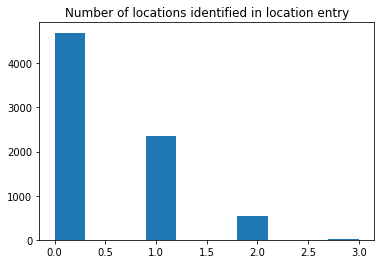

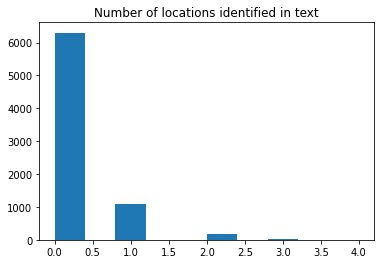

In [27]:
##check number of locations identified for location and text data
plt.hist([len(r['geoparsed_location']) for i, r in train.iterrows()])
plt.title('Number of locations identified in location entry')
plt.show()
plt.hist([len(r['geoparsed_text']) for i, r in train.iterrows()])
plt.title('Number of locations identified in text')
plt.show()
#it looks like both text and location entries mostly had less than 2 geoparsed locations, so we will only store two for each

In [32]:
##insert columns to store info for geoparsed locations in location and text data
#store name, coordinates, and country for each location
train.insert(7, 'gp_loc_1_place_name', ['' for i in range(len(train))])
train.insert(7, 'gp_loc_1_country', ['' for i in range(len(train))])
train.insert(7, 'gp_loc_1_lat', [0.0 for i in range(len(train))])
train.insert(7, 'gp_loc_1_long', [0.0 for i in range(len(train))])

train.insert(7, 'gp_loc_2_place_name', ['' for i in range(len(train))])
train.insert(7, 'gp_loc_2_country', ['' for i in range(len(train))])
train.insert(7, 'gp_loc_2_lat', [0.0 for i in range(len(train))])
train.insert(7, 'gp_loc_2_long', [0.0 for i in range(len(train))])

train.insert(7, 'gp_txt_1_place_name', ['' for i in range(len(train))])
train.insert(7, 'gp_txt_1_country', ['' for i in range(len(train))])
train.insert(7, 'gp_txt_1_lat', [0.0 for i in range(len(train))])
train.insert(7, 'gp_txt_1_long', [0.0 for i in range(len(train))])

train.insert(7, 'gp_txt_2_place_name', ['' for i in range(len(train))])
train.insert(7, 'gp_txt_2_country', ['' for i in range(len(train))])
train.insert(7, 'gp_txt_2_lat', [0.0 for i in range(len(train))])
train.insert(7, 'gp_txt_2_long', [0.0 for i in range(len(train))])

ValueError: cannot insert gp_loc_1_country, already exists

In [33]:
#check that columns were inserted successfully
train.columns

Index(['geoparsed_text', 'geoparsed_location', 'id', 'keyword', 'location',
       'text', 'target', 'gp_loc_1_place_name', 'gp_txt_2_long',
       'gp_txt_2_lat', 'gp_txt_2_country', 'gp_txt_2_place_name',
       'gp_txt_1_long', 'gp_txt_1_lat', 'gp_txt_1_country',
       'gp_txt_1_place_name', 'gp_loc_2_long', 'gp_loc_2_lat',
       'gp_loc_2_country', 'gp_loc_2_place_name', 'gp_loc_1_long',
       'gp_loc_1_lat', 'gp_loc_1_country'],
      dtype='object')

In [131]:
#fill in columns with stored geoparsing results
for index, row in train.iterrows():
    #fill in geoparsed LOCATION data:
    if len(row['geoparsed_location']) > 0: #check if geoparsed data was collected
        info = row['geoparsed_location']
        for i in range(min(len(info), 2)): #iterate through info for max two geoparsed places
            geo_dict = info[i]
            ##store relevant info in correct column
            train.at[index, 'gp_loc_' + str(i + 1) + '_place_name'] = geo_dict['place_name']
            train.at[index, 'gp_loc_' + str(i + 1) + '_country'] = geo_dict['country_code3']
            train.at[index, 'gp_loc_' + str(i + 1) + '_lat'] = geo_dict['lat']
            train.at[index, 'gp_loc_' + str(i + 1) + '_long'] = geo_dict['lon']

    #fill in geoparsed TEXT data:
    if len(row['geoparsed_text']) > 0: #check if geoparsed data was collected
        info = row['geoparsed_text']
        for i in range(min(len(info), 2)): #iterate through info for max two geoparsed places
            geo_dict = info[i]
            ##store relevant info in correct column
            train.at[index, 'gp_txt_' + str(i + 1) + '_place_name'] = geo_dict['place_name']
            train.at[index, 'gp_txt_' + str(i + 1) + '_country'] = geo_dict['country_code3']
            train.at[index, 'gp_txt_' + str(i + 1) + '_lat'] = geo_dict['lat']
            train.at[index, 'gp_txt_' + str(i + 1) + '_long'] = geo_dict['lon']


In [141]:
train.to_csv('data/geoparsed_train.csv') #store data

In [9]:
##merge spellcheck and geoparse into one file
spellchecked = pd.read_csv('data/spellchecked_train.csv')
geoparsed = pd.read_csv('data/geoparsed_train.csv')


In [10]:
complete = geoparsed.merge(spellchecked, left_on=['id', 'keyword', 'location', 'text', 'target', 'Unnamed: 0'], right_on=['id', 'keyword', 'location_data', 'text_data', 'target_data', 'Unnamed: 0'])

#verify length
print(len(complete))

7613


In [11]:
#store as csv
complete.to_csv('data/geoparsed_spellchecked_train.csv')